# 1 - Importando bibliotecas e os dados

In [1]:
#Importando bibliotecas que iremos utilizar.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew
import warnings

#Setando configurações de dataframe para mostrar 80 colunar e 80 linhas.
pd.set_option('display.max_columns', 80 )
pd.set_option('display.max_rows', 80)

In [2]:
warnings.filterwarnings(action='ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Atribuindo base de dados para variável df_enem
df_enem = pd.read_csv("/content/drive/MyDrive/Digital House/Workshop I/enem_São Paulo.csv")

# 2 - Familiarizando com os dados


In [5]:
df_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200001334237,2020,4,M,1,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1,1,1,1,699.0,687.0,691.0,695.0,604.6,604.8,562.1,753.2,CECACBBCADACADDEEBDBCBAEEEEBDADABDCEEDDCCDCBC,EAADABBEABCADDBAAEDBCABDABAACAEAEEABECBBADEDB,CADDE99999AEEADBAAABEEECEEDADACBDECABEBEADBCCB...,BABADDBDAEBAEBBBEEDEEECBCEBBDACCEABDCCBADDCCE,0,DEAAECBBCDCBAEBEEBDBCCACECCDACDABDDBADDECBEBA,EAAADBBEDBDACDBCCDEBDBBCBBADCAECDBABDBCBADEDB,CADDE99999DEBBBBBAADBECBEACCBECEDAEABEECBDCCAD...,BABBDABAEEBACBACDEDEEXCACEBBADCBEABADCBADDCCE,1.0,140.0,120.0,120.0,120.0,100.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200004902048,2020,6,M,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,7.0,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,C,B,B,B
2,200005550767,2020,2,F,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,B,3.0,D,A,B,C,B,A,B,B,B,A,B,A,B,D,A,B,D,B,B,B
3,200001141912,2020,2,M,3,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1,1,1,1,597.0,569.0,580.0,587.0,439.6,395.6,505.7,339.2,DDDCAAEBBCACACCCCAABBACDBEADACDCAABCACCCDAAEA,ADABADCCAECACEBACEADBBDDCDBBBCEDAAAAEAAACDBAE,ACCEA99999BACABDAEBBCADBEEEEECEEADEEAAEABDCECC...,CECDACBDADBACBDAEDDBECAEACDDDCCCCCACABEDADBAD,0,DDBACBDDDECDAEDCCCEDBDDCBDDCAAECEDDACCBAEDCDX,DECCADEBDECBBECDDCBACDBDEEDABCDDAEDBECECBCCBD,DCEAAEEEACAACBBEBEBAAADBBAEBCEDBAADADDEADEBDAC...,DABCCAEDBBCCCABCACCBDXCCCBEEEDBBACCDACBAEBAEC,1.0,60.0,40.0,40.0,100.0,40.0,280.0,D,E,C,B,4.0,C,A,B,C,B,A,B,B,B,A,B,A,A,C,A,A,D,A,A,B
4,200004149124,2020,5,M,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1,1,1,1,598.0,567.0,577.0,588.0,447.4,599.6,528.2,627.8,AEBDBBCEAEBDECDDCCADDBDAABACECCCEACCCDABDEDAE,ADADBADAACDEBEEBCAEDDACEDCACECEDCDCABAEBBECDB,99999AEACDABDBEBBEDBECBDADADABDDCBCDBBEADCBCDB...,EDCBCDDEDBCABCCCCDBCDACBADCEADADCCEEBAAAECBCA,1,CEDBDDDCACCBDAEBADCBDCDXAAECEDDDECDDCBDDAEDCC,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,1.0,140.0,200.0,140.0,200.0,180.0,860.0,B,C,A,B,4.0,B,A,B,D,B,A,B,A,A,A,B,A,A,B,A,A,C,A,A,B


Vamos olhar para como estão organizados os dados pelas nossas colunas

In [6]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250475 entries, 0 to 250474
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            250475 non-null  int64  
 1   NU_ANO                  250475 non-null  int64  
 2   TP_FAIXA_ETARIA         250475 non-null  int64  
 3   TP_SEXO                 250475 non-null  object 
 4   TP_ESTADO_CIVIL         250475 non-null  int64  
 5   TP_COR_RACA             250475 non-null  int64  
 6   TP_NACIONALIDADE        250475 non-null  int64  
 7   TP_ST_CONCLUSAO         250475 non-null  int64  
 8   TP_ANO_CONCLUIU         250475 non-null  int64  
 9   TP_ESCOLA               250475 non-null  int64  
 10  TP_ENSINO               49385 non-null   float64
 11  IN_TREINEIRO            250475 non-null  int64  
 12  CO_MUNICIPIO_ESC        37315 non-null   float64
 13  NO_MUNICIPIO_ESC        37315 non-null   object 
 14  CO_UF_ESC           

Precisamos adequar as colunas do tipo object para que possam ser usada pelos modelos de regressão.

# 3 - Limpando os dados

Vamos remover as colunas que não são úteis para os nossos modelos de regressão.

In [7]:
colunas_constantes = [
    'NU_ANO',
    'CO_MUNICIPIO_PROVA',
    'NO_MUNICIPIO_PROVA',
    'CO_UF_PROVA',
    'SG_UF_PROVA'
    ]

colunas_uniformes = [
    'TX_RESPOSTAS_CN',
    'TX_RESPOSTAS_CH',
    'TX_RESPOSTAS_LC',
    'TX_RESPOSTAS_MT',
    ]

coluna_valores_unicos = [
    'NU_INSCRICAO'
    ]

colunas_nan_acima_80 = [
    'TP_ENSINO',
    'CO_MUNICIPIO_ESC',
    'NO_MUNICIPIO_ESC',
    'CO_UF_ESC',
    'SG_UF_ESC',
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC',
    'TP_SIT_FUNC_ESC'
    ]

colunas_multicolinearidade = [
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',         
    'TP_PRESENCA_LC',         
    'TP_PRESENCA_MT',           
    'CO_PROVA_CN',               
    'CO_PROVA_CH',            
    'CO_PROVA_LC',            
    'CO_PROVA_MT',            
    'TX_GABARITO_CN',          
    'TX_GABARITO_CH',          
    'TX_GABARITO_LC',           
    'TX_GABARITO_MT',          
    'TP_STATUS_REDACAO',       
    'NU_NOTA_COMP1',           
    'NU_NOTA_COMP2',           
    'NU_NOTA_COMP3',           
    'NU_NOTA_COMP4',           
    'NU_NOTA_COMP5'           
]

In [8]:
df_enem = df_enem.drop(columns = (colunas_constantes + colunas_uniformes + coluna_valores_unicos + colunas_nan_acima_80 + colunas_multicolinearidade))

In [9]:
df_enem.dropna(how='any', inplace=True)

In [10]:
df_enem

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,2,M,3,3,1,2,0,2,0,439.6,395.6,505.7,339.2,0,280.0,D,E,C,B,4.0,C,A,B,C,B,A,B,B,B,A,B,A,A,C,A,A,D,A,A,B
4,5,M,1,3,1,1,3,1,0,447.4,599.6,528.2,627.8,1,860.0,B,C,A,B,4.0,B,A,B,D,B,A,B,A,A,A,B,A,A,B,A,A,C,A,A,B
5,3,M,1,2,1,2,0,3,0,530.9,631.1,601.8,634.6,0,700.0,F,E,F,F,3.0,D,A,C,D,A,A,B,B,B,A,B,A,A,B,A,A,D,B,A,B
7,4,F,1,2,1,1,2,1,0,529.2,599.4,632.4,479.3,0,680.0,E,D,B,B,3.0,E,A,C,C,A,A,B,B,A,A,B,A,A,B,A,A,D,A,B,B
8,7,F,1,1,1,1,4,1,0,591.2,680.1,664.1,623.5,0,900.0,H,D,F,B,3.0,C,A,B,B,A,A,B,A,B,A,B,A,B,B,A,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250445,1,F,1,1,1,3,0,1,1,473.7,487.8,544.0,580.1,0,700.0,E,G,F,F,2.0,J,A,B,C,B,A,B,B,B,A,B,A,B,C,B,B,C,B,C,B
250454,12,M,2,3,1,1,0,1,0,585.7,568.9,544.0,566.1,0,340.0,B,B,A,A,3.0,D,A,B,B,A,B,B,A,A,A,A,A,A,B,B,A,D,A,B,B
250466,6,M,1,3,1,1,0,1,0,456.6,406.1,522.7,471.0,1,440.0,H,F,F,E,2.0,A,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
250467,11,M,1,3,1,1,7,1,0,473.8,456.5,379.4,386.4,1,340.0,B,B,F,F,3.0,C,A,B,B,A,B,B,A,B,A,A,A,B,B,B,A,C,A,A,B


# 4 - Adequando os tipos das features

In [11]:
df_enem['TP_SEXO'] = df_enem.TP_SEXO.replace({'M':0, 'F':1})
valores = {'':0,'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11, 'L':12, 'M':13, 'N':14, 'O':15, 'P':16, 'Q':17, 'R':18, 'S':19, 'T':20}
for i in ['Q0'+'{:02}'.format(i) for i in range(1,26)]:
  df_enem[i] = df_enem[i].replace(valores)

In [12]:
df_enem.dtypes

TP_FAIXA_ETARIA       int64
TP_SEXO               int64
TP_ESTADO_CIVIL       int64
TP_COR_RACA           int64
TP_NACIONALIDADE      int64
TP_ST_CONCLUSAO       int64
TP_ANO_CONCLUIU       int64
TP_ESCOLA             int64
IN_TREINEIRO          int64
NU_NOTA_CN          float64
NU_NOTA_CH          float64
NU_NOTA_LC          float64
NU_NOTA_MT          float64
TP_LINGUA             int64
NU_NOTA_REDACAO     float64
Q001                  int64
Q002                  int64
Q003                  int64
Q004                  int64
Q005                float64
Q006                  int64
Q007                  int64
Q008                  int64
Q009                  int64
Q010                  int64
Q011                  int64
Q012                  int64
Q013                  int64
Q014                  int64
Q015                  int64
Q016                  int64
Q017                  int64
Q018                  int64
Q019                  int64
Q020                  int64
Q021                

# 5 - Criando a nova coluna target

In [13]:
df_enem['NU_NOTA_MEDIA'] = (df_enem.NU_NOTA_CH + df_enem.NU_NOTA_CN + df_enem.NU_NOTA_MT + df_enem.NU_NOTA_LC + df_enem.NU_NOTA_REDACAO)/5


 Média = 556.51 and Desvio Padrão = 93.15



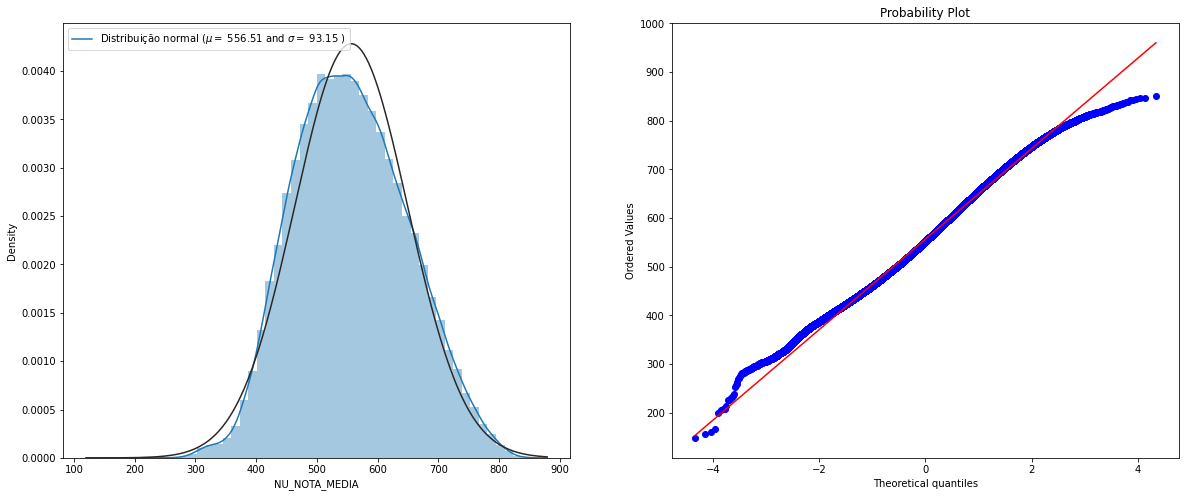

In [28]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.distplot(df_enem['NU_NOTA_MEDIA'] , fit=norm, ax = ax[0]);

(mu, sigma) = norm.fit(df_enem['NU_NOTA_MEDIA'])
print( '\n Média = {:.2f} and Desvio Padrão = {:.2f}\n'.format(mu, sigma))

ax[0].legend(['Distribuição normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

ax[1] = stats.probplot(df_enem['NU_NOTA_MEDIA'], plot=plt)


In [15]:
df_enem = df_enem[df_enem.NU_NOTA_MEDIA > 0]

# 7 - Verificando a correlação

In [16]:
correlacao = df_enem.drop(columns=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']).corr()

In [17]:
pd.set_option('display.precision', 3)
correlacao.rename(columns={i:i.split('_')[-1][:7] for i in correlacao.columns if '_' in i}).abs().style.background_gradient(cmap='Blues').set_properties(**{'width':'1px','height':'1px'})

,ETARIA,SEXO,CIVIL,RACA,NACIONA,CONCLUS,CONCLUI,ESCOLA,TREINEI,LINGUA,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,MEDIA
TP_FAIXA_ETARIA,1.000,0.018,0.323,0.114,0.002,0.581,0.805,0.383,0.351,0.217,0.332,0.442,0.238,0.268,0.207,0.302,0.165,0.277,0.311,0.298,0.045,0.110,0.278,0.186,0.155,0.184,0.135,0.244,0.281,0.144,0.235,0.340,0.149,0.223,0.167,0.213
TP_SEXO,0.018,1.000,0.019,0.006,0.000,0.011,0.007,0.044,0.038,0.086,0.040,0.047,0.031,0.052,0.013,0.068,0.019,0.037,0.044,0.055,0.022,0.026,0.009,0.035,0.030,0.044,0.035,0.055,0.066,0.006,0.028,0.015,0.024,0.075,0.033,0.059
TP_ESTADO_CIVIL,0.323,0.019,1.000,0.037,0.001,0.118,0.242,0.090,0.065,0.087,0.121,0.165,0.090,0.089,0.049,0.073,0.041,0.073,0.086,0.060,0.011,0.031,0.081,0.034,0.048,0.033,0.033,0.054,0.073,0.030,0.054,0.100,0.031,0.059,0.037,0.108
TP_COR_RACA,0.114,0.006,0.037,1.000,0.079,0.110,0.076,0.111,0.067,0.113,0.148,0.182,0.126,0.160,0.017,0.211,0.124,0.178,0.153,0.175,0.041,0.062,0.102,0.115,0.087,0.116,0.137,0.172,0.176,0.080,0.169,0.107,0.087,0.181,0.074,0.165
TP_NACIONALIDADE,0.002,0.000,0.001,0.079,1.000,0.002,0.010,0.007,0.003,0.056,0.006,0.018,0.001,0.001,0.036,0.027,0.007,0.005,0.004,0.028,0.011,0.001,0.017,0.035,0.003,0.047,0.002,0.026,0.038,0.009,0.024,0.020,0.016,0.012,0.005,0.048
TP_ST_CONCLUSAO,0.581,0.011,0.118,0.110,0.002,1.000,0.488,0.352,0.777,0.138,0.238,0.292,0.187,0.226,0.094,0.303,0.188,0.273,0.248,0.278,0.050,0.108,0.170,0.151,0.142,0.160,0.153,0.239,0.256,0.150,0.230,0.212,0.130,0.232,0.111,0.039
TP_ANO_CONCLUIU,0.805,0.007,0.242,0.076,0.010,0.488,1.000,0.371,0.244,0.142,0.250,0.318,0.172,0.187,0.192,0.203,0.135,0.205,0.228,0.216,0.032,0.079,0.207,0.123,0.115,0.115,0.101,0.166,0.208,0.104,0.171,0.258,0.097,0.139,0.101,0.079
TP_ESCOLA,0.383,0.044,0.090,0.111,0.007,0.352,0.371,1.000,0.240,0.112,0.207,0.252,0.166,0.202,0.060,0.270,0.152,0.240,0.218,0.245,0.039,0.088,0.149,0.133,0.120,0.134,0.139,0.210,0.229,0.124,0.209,0.171,0.106,0.206,0.095,0.114
IN_TREINEIRO,0.351,0.038,0.065,0.067,0.003,0.777,0.244,0.240,1.000,0.093,0.148,0.179,0.118,0.146,0.047,0.222,0.149,0.198,0.166,0.186,0.034,0.079,0.108,0.090,0.106,0.103,0.116,0.164,0.170,0.105,0.156,0.135,0.095,0.175,0.069,0.028
TP_LINGUA,0.217,0.086,0.087,0.113,0.056,0.138,0.142,0.112,0.093,1.000,0.205,0.247,0.160,0.191,0.004,0.287,0.138,0.233,0.214,0.220,0.030,0.088,0.168,0.148,0.128,0.146,0.133,0.225,0.199,0.109,0.196,0.181,0.118,0.257,0.122,0.354


In [18]:
alta_correlacao = correlacao[correlacao.abs() >= 0.3]
contagem_correlacao = pd.DataFrame(alta_correlacao.describe().transpose()['count'].sort_values(ascending=False))
print('Correlação das variáveis com a Nota Média')
print(alta_correlacao['NU_NOTA_MEDIA'].dropna().sort_values(ascending=False).iloc[1:])
print('\nCorrelação das variáveis com a Renda Familiar')
print(alta_correlacao['Q006'].dropna().sort_values(ascending=False).iloc[1:])

Correlação das variáveis com a Nota Média
Q006         0.480
Q024         0.431
Q008         0.379
Q002         0.371
Q010         0.341
Q018         0.336
Q009         0.326
Q001         0.307
TP_LINGUA   -0.354
Name: NU_NOTA_MEDIA, dtype: float64

Correlação das variáveis com a Renda Familiar
Q008               0.663
Q024               0.645
Q010               0.612
Q009               0.555
Q019               0.543
Q018               0.517
Q021               0.513
Q007               0.506
Q002               0.497
NU_NOTA_MEDIA      0.480
Q004               0.462
Q022               0.446
Q001               0.421
Q017               0.418
Q015               0.370
Q003               0.359
Q013               0.342
Q020               0.309
TP_ST_CONCLUSAO    0.303
TP_FAIXA_ETARIA   -0.302
Name: Q006, dtype: float64


Correlação das features com a Nota Média


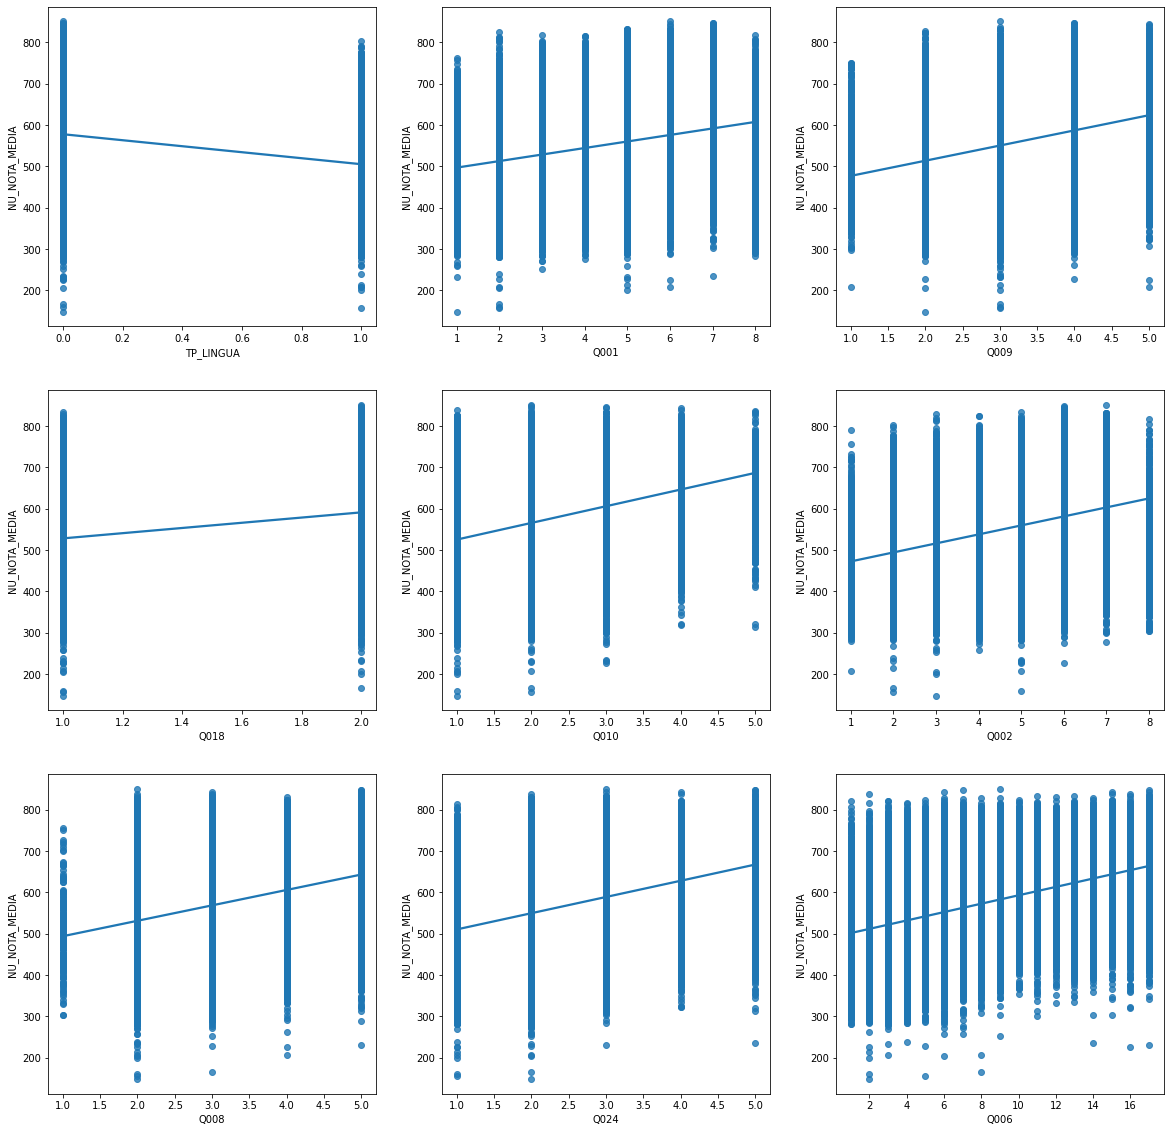

In [19]:
print('Correlação das features com a Nota Média')
fig, ax = plt.subplots(3,3, figsize = (20,20))
for i, col in enumerate(alta_correlacao['NU_NOTA_MEDIA'].iloc[:-1].dropna().sort_values().index):
  sns.regplot(x=col, y='NU_NOTA_MEDIA', data=df_enem, ax=ax[i//3,i%3]);

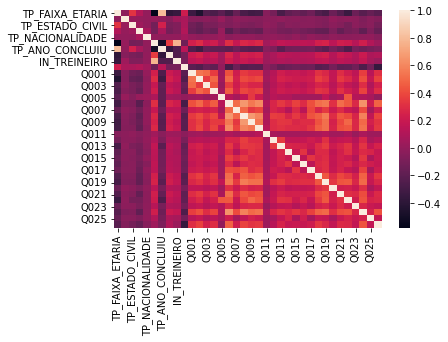

In [20]:
sns.heatmap(correlacao);

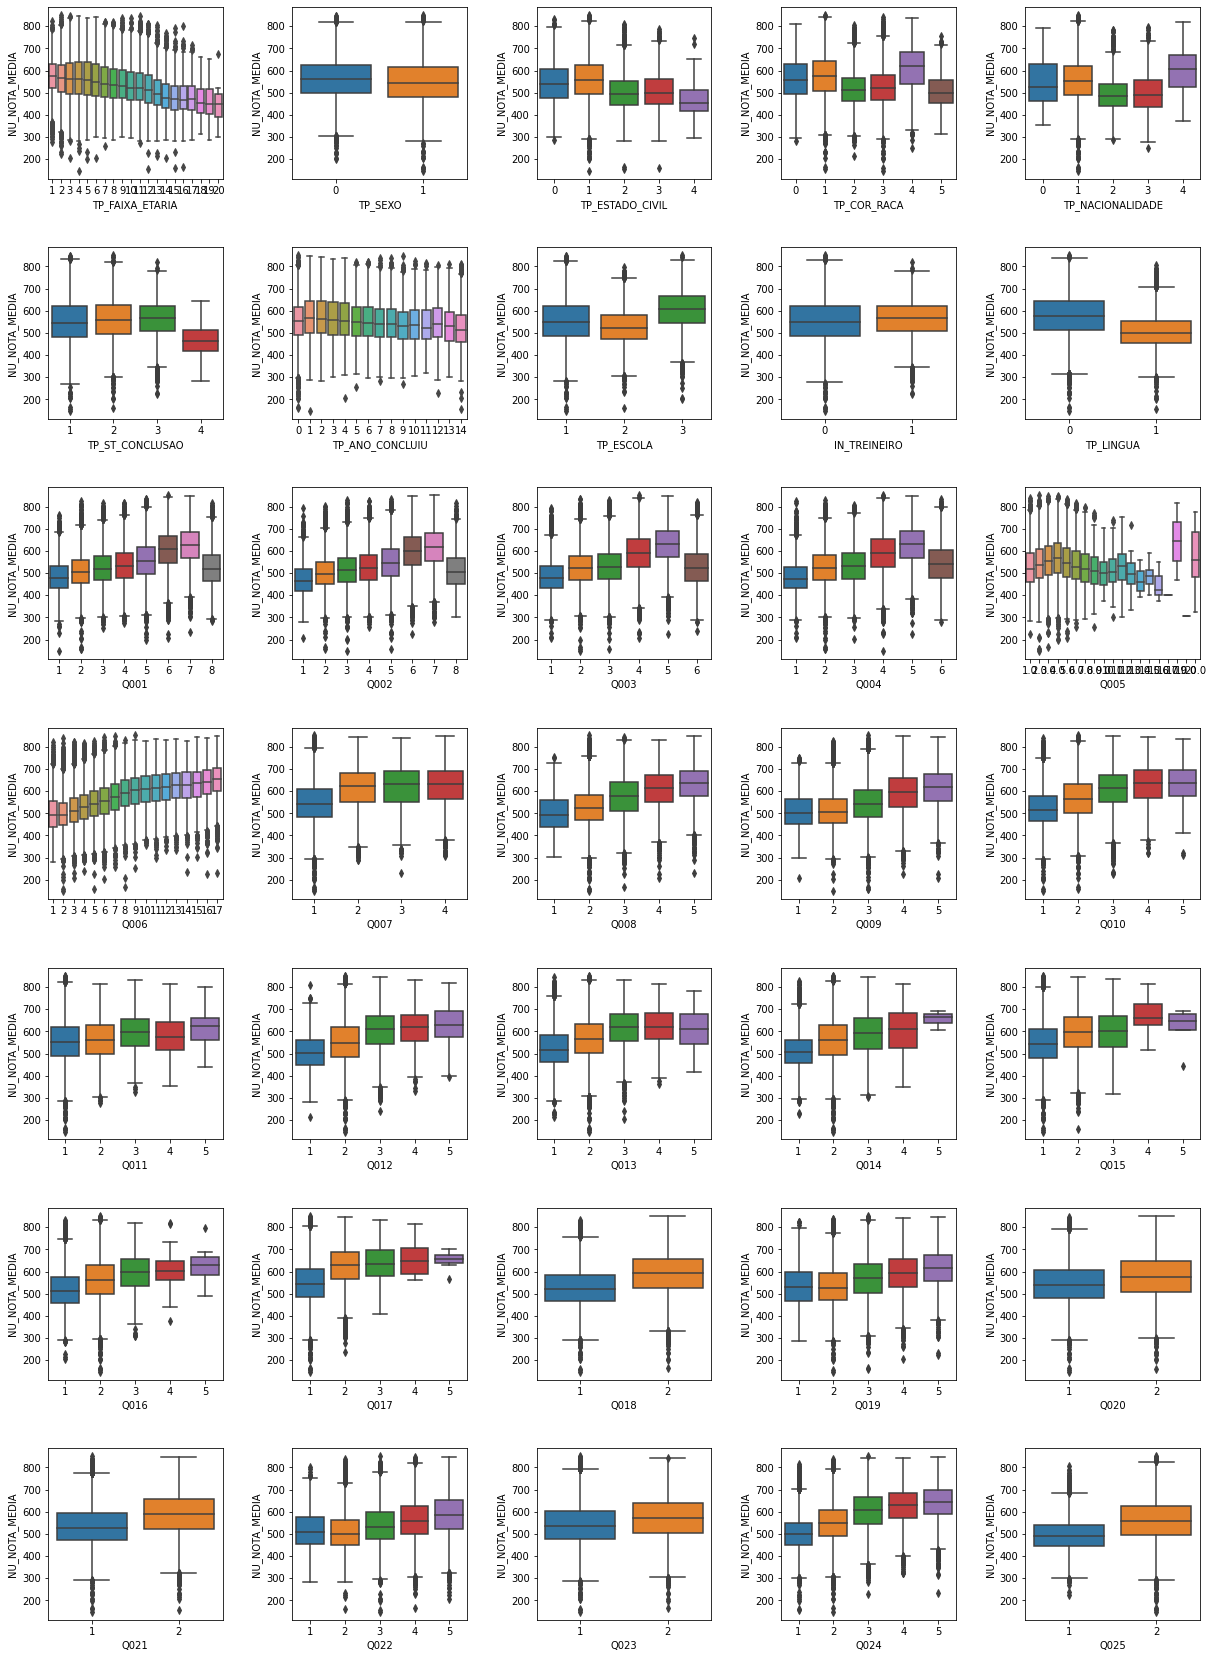

In [26]:
fig, ax = plt.subplots(7,5, figsize = (20,28))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i, col in enumerate(X.columns):
  sns.boxplot(ax=ax[i//5,i%5], x=col, y='NU_NOTA_MEDIA', data=df_enem)

# 8 - Separando os targets

In [24]:
target_columns = [i for i in df_enem.columns if 'NU_NOTA' in i]

In [25]:
X = df_enem.drop(columns = target_columns)
y = df_enem[target_columns]

# 10 - Separando dados de treino e de teste

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y['NU_NOTA_MEDIA'], random_state=42)

# 11 - Funções para avaliação dos modelos

In [31]:
from sklearn import metrics
def avalia_modelo(previsto, teste):
  print('MAE:', metrics.mean_absolute_error(teste, previsto))
  print('MSE:', metrics.mean_squared_error(teste, previsto))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(teste, previsto)))
  print('R2:', metrics.r2_score(teste, previsto))


In [32]:
def plota_modelo(previsto, teste):
  df = pd.concat([pd.DataFrame(previsto).reset_index(drop=True), teste.reset_index(drop=True)], axis=1)
  df.columns = ['pred', 'real']
  return sns.lmplot('pred', 'real', df, scatter_kws={'alpha':0.05})


# 12 - Ordinary Least Squares

In [33]:
from statsmodels.regression.linear_model import OLS
ols = OLS(y_train, X_train)
ols = ols.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          NU_NOTA_MEDIA   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          9.638e+04
Date:                Sun, 28 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:40:53   Log-Likelihood:                     -4.3103e+05
No. Observations:               73896   AIC:                                  8.621e+05
Df Residuals:                   73861   BIC:                                  8.624e+05
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
TP_FAIXA_ETARIA     -0.4253      0.154     -2.768      0.006      -0.727      -0.124
TP_SEXO              6.6920      0.620     10.798      0.000       5.477       7.907
TP_ESTADO_CIVIL      6.3873      0.825      7.739      0.000       4.770       8.005
TP_COR_RACA          3.2030      0.304     10.519      0.000       2.606       3.800
TP_NACIONALIDADE    28.9127      1.161     24.909      0.000      26.638      31.188
TP_ST_CONCLUSAO     -0.2809      1.430     -0.196      0.844      -3.083       2.521
TP_ANO_CONCLUIU      3.2349      0.136     23.765      0.000       2.968       3.502
TP_ESCOLA           -4.6554      0.991     -4.699      0.000      -6.597      -2.714
IN_TREINEIRO       -31.1765      2.976    -10.475      0.000     -37.010     -25.343
TP_LINGUA          -32.0448      0.717    -44.694      0.000     -33.450     -30.640
Q001                 3.3347      0.221     15.069      0.000       2.901       3.768
Q002                10.4801      0.264     39.683      0.000       9.963      10.998
Q003                 3.0633      0.270     11.332      0.000       2.534       3.593
Q004                 1.6844      0.276      6.098      0.000       1.143       2.226
Q005                -2.6584      0.275     -9.658      0.000      -3.198      -2.119
Q006                 2.4917      0.118     21.098      0.000       2.260       2.723
Q007                -2.0083      0.549     -3.660      0.000      -3.084      -0.933
Q008                 3.0035      0.539      5.576      0.000       1.948       4.059
Q009                 4.1541      0.564      7.366      0.000       3.049       5.259
Q010                -4.5436      0.551     -8.250      0.000      -5.623      -3.464
Q011                19.5602      1.012     19.336      0.000      17.578      21.543
Q012                47.8623      1.112     43.042      0.000      45.683      50.042
Q013                 6.7223      0.642     10.478      0.000       5.465       7.980
Q014                14.3450      0.947     15.150      0.000      12.489      16.201
Q015                 5.2881      0.844      6.267      0.000       3.634       6.942
Q016                11.6183      0.820     14.160      0.000      10.010      13.226
Q017                26.6403      1.235     21.578      0.000      24.220      29.060
Q018                12.0905      0.781     15.483      0.000      10.560      13.621
Q019                -7.5995      0.444    -17.097      0.000      -8.471      -6.728
Q020                 6.9471      0.689     10.078      0.000       5.596       8.298
Q021                 4.8246      0.764      6.317      0.000       3.328       6.322
Q022                 7.3297      0.395     18.578      0.000       6.556       8.103
Q023     

In [34]:
ols_pred = ols.predict(X_test)

In [35]:
avalia_modelo(ols_pred, y_test)

MAE: 65.39471491854553
MSE: 6796.076467523981
RMSE: 82.43831916969184
R2: 0.21340568603781696


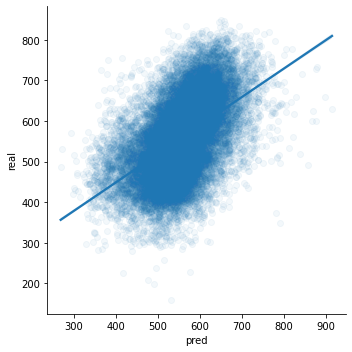

In [36]:
plota_modelo(ols_pred, y_test);

In [37]:
X_ols = df_enem.drop(columns=[i for i in df_enem.columns if 'NU_NOTA' in i])
y_ols = df_enem.NU_NOTA_MEDIA

In [38]:
X_ols_train, X_ols_test, y_ols_train, y_ols_test = train_test_split(X_ols, y_ols)

In [39]:
ols_features_removed = []
while True:
  ols = OLS(y_ols_train, X_ols_train)
  ols = ols.fit()
  if (ols.pvalues >= 0.05).sum() > 0:
    X_ols_train.drop(columns=(ols.pvalues[ols.pvalues == ols.pvalues.max()].index[0]), inplace=True)
    ols_features_removed.append(ols.pvalues[ols.pvalues == ols.pvalues.max()].index[0])
  else:
    break
print(ols_features_removed)
ols.summary()

['TP_ST_CONCLUSAO']


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          NU_NOTA_MEDIA   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          9.987e+04
Date:                Sun, 28 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:40:55   Log-Likelihood:                     -4.3079e+05
No. Observations:               73896   AIC:                                  8.617e+05
Df Residuals:                   73862   BIC:                                  8.620e+05
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
TP_FAIXA_ETARIA     -0.4011      0.153     -2.613      0.009      -0.702      -0.100
TP_SEXO              7.0492      0.617     11.426      0.000       5.840       8.258
TP_ESTADO_CIVIL      6.5319      0.820      7.962      0.000       4.924       8.140
TP_COR_RACA          3.1292      0.303     10.312      0.000       2.534       3.724
TP_NACIONALIDADE    29.0042      1.156     25.093      0.000      26.739      31.270
TP_ANO_CONCLUIU      3.1378      0.135     23.243      0.000       2.873       3.402
TP_ESCOLA           -4.9284      0.531     -9.282      0.000      -5.969      -3.888
IN_TREINEIRO       -32.0545      1.084    -29.563      0.000     -34.180     -29.929
TP_LINGUA          -31.3880      0.714    -43.991      0.000     -32.786     -29.990
Q001                 3.4340      0.220     15.626      0.000       3.003       3.865
Q002                10.0804      0.263     38.294      0.000       9.564      10.596
Q003                 2.8487      0.269     10.585      0.000       2.321       3.376
Q004                 1.8542      0.276      6.727      0.000       1.314       2.394
Q005                -2.7523      0.272    -10.122      0.000      -3.285      -2.219
Q006                 2.5207      0.117     21.618      0.000       2.292       2.749
Q007                -2.1362      0.549     -3.889      0.000      -3.213      -1.060
Q008                 2.8724      0.537      5.351      0.000       1.820       3.924
Q009                 4.4288      0.562      7.881      0.000       3.327       5.530
Q010                -4.7479      0.547     -8.673      0.000      -5.821      -3.675
Q011                20.0255      1.011     19.801      0.000      18.043      22.008
Q012                47.5802      1.102     43.162      0.000      45.420      49.741
Q013                 7.5368      0.642     11.742      0.000       6.279       8.795
Q014                13.7844      0.948     14.546      0.000      11.927      15.642
Q015                 5.2969      0.841      6.298      0.000       3.648       6.945
Q016                11.0860      0.818     13.548      0.000       9.482      12.690
Q017                27.7342      1.240     22.375      0.000      25.305      30.164
Q018                11.3476      0.776     14.624      0.000       9.827      12.868
Q019                -7.6959      0.443    -17.373      0.000      -8.564      -6.828
Q020                 7.2475      0.687     10.546      0.000       5.900       8.594
Q021                 5.5599      0.760      7.317      0.000       4.071       7.049
Q022                 7.3154      0.391     18.688      0.000       6.548       8.083
Q023                 5.7314      0.661      8.665      0.000       4.435       7.028
Q024     

In [40]:
ols_pred = ols.predict(X_ols_test[X_ols_train.columns])

In [41]:
avalia_modelo(ols_pred, y_ols_test)

MAE: 65.96469193524668
MSE: 6925.366664242484
RMSE: 83.21878792822258
R2: 0.20512849735978422


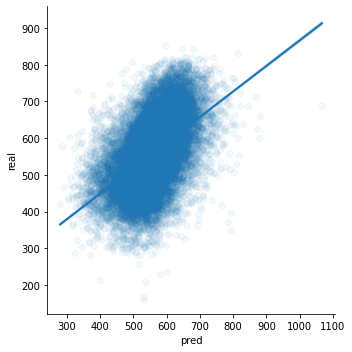

In [42]:
plota_modelo(ols_pred, y_ols_test);

# 13 - Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
lm_pred = lm.predict(X_test)

In [45]:
avalia_modelo(lm_pred, y_test)


MAE: 58.64396662602809
MSE: 5431.534036747557
RMSE: 73.69894189706903
R2: 0.37134112457179835


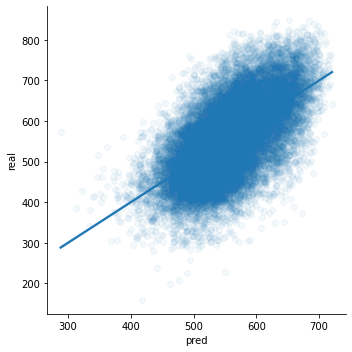

In [46]:
plota_modelo(lm_pred,y_test);

# 14 - Gradient Boosting Regression

In [47]:
from sklearn import ensemble


In [48]:
gbr = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=4, min_samples_split=2,learning_rate=0.05, loss='ls')
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [49]:
avalia_modelo(gbr_pred, y_test)

MAE: 56.6586883815473
MSE: 5078.804637653736
RMSE: 71.26573256238748
R2: 0.4121668776398155


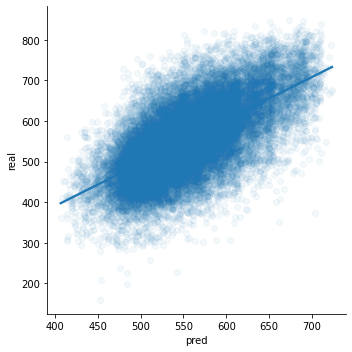

In [50]:
plota_modelo(gbr_pred, y_test);

# 15 - Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [53]:
avalia_modelo(dtr_pred, y_test)

MAE: 82.41221811735413
MSE: 10849.831666577804
RMSE: 104.16252525058042
R2: -0.2557857371322789


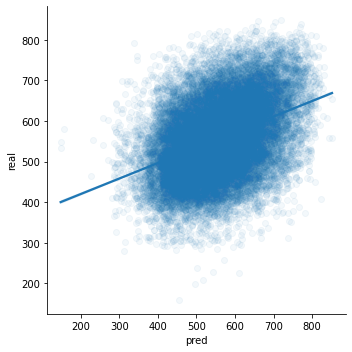

In [54]:
plota_modelo(dtr_pred, y_test);

# 16 - Support Vector Machine Regression

In [55]:
from sklearn.svm import SVR

In [56]:
df_enem_svm = df_enem.sample(frac=0.2)
X_svm = df_enem_svm.drop(columns=[i for i in df_enem_svm.columns if 'NU_NOTA' in i])
y_svm = df_enem_svm['NU_NOTA_MEDIA']
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, random_state=42)

In [57]:
svr = SVR(kernel='rbf')
svr.fit(X_train_svm, y_train_svm)
svr_pred = svr.predict(X_test)

In [58]:
avalia_modelo(svr_pred, y_test)

MAE: 59.69007919094622
MSE: 5619.8709944599805
RMSE: 74.96579883160041
R2: 0.34954254994517964


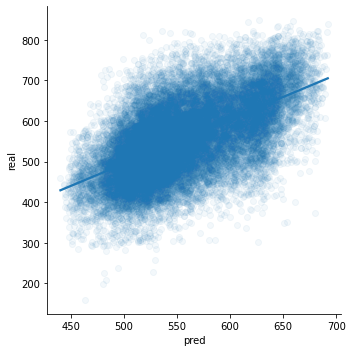

In [59]:
plota_modelo(svr_pred, y_test);

# 17 - Random Forest Regression


In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [62]:
avalia_modelo(rfr_pred, y_test)

MAE: 57.29609424154024
MSE: 5221.945386428447
RMSE: 72.26302918109957
R2: 0.39559942145822


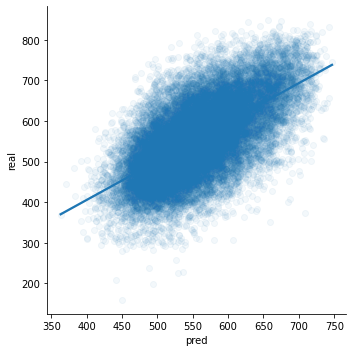

In [63]:
plota_modelo(rfr_pred, y_test);

# 18 - Light Gradient Boosting Regression


In [64]:
import lightgbm

In [65]:
lgbr = lightgbm.LGBMRegressor(objective='regression')
lgbr.fit(X_train, y_train)
lgbr_pred = lgbr.predict(X_test)

In [66]:
avalia_modelo(lgbr_pred, y_test)

MAE: 55.7626801873512
MSE: 4949.92330203989
RMSE: 70.35569132657209
R2: 0.4270839148824289


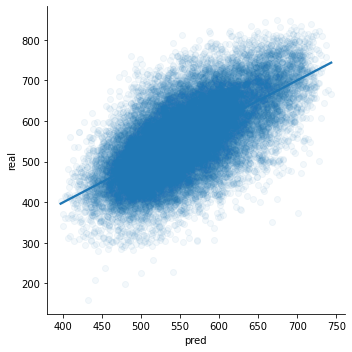

In [67]:
plota_modelo(lgbr_pred, y_test);

# 19 - XGBoost Regression 

In [68]:
import xgboost

In [69]:
xgbr = xgboost.XGBRegressor()
xgbr = xgbr.fit(X_train, y_train)

[22:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [70]:
xgbr_pred = xgbr.predict(X_test)

In [71]:
avalia_modelo(xgbr_pred, y_test)

MAE: 56.45818266786512
MSE: 5058.704252136005
RMSE: 71.12456855500781
R2: 0.4144933448348581


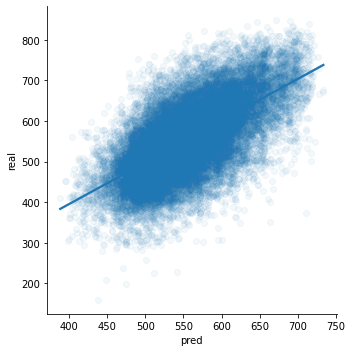

In [72]:
plota_modelo(xgbr_pred, y_test);

# 19 - Testando a biblioteca AutoML

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.1 MB 33 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=d8a79266ff8671e52d9588c9bea92315f9889ec90ac39a9f8f1ec90c06ad1699
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_5j4or11
  JVM stdout: /tmp/tmp_5j4or11/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_5j4or11/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_phy5nk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = h2o.H2OFrame(df_enem.drop(columns=['NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_REDACAO']))
df.describe()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:98530
Cols:36




,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_LINGUA,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_MEDIA
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real
mins,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
mean,4.805988023952106,0.5832944280929666,1.0475083730843406,1.7921343753171575,1.0345985994113482,1.5774180452654034,2.361534558002633,1.4312595148685663,0.13615142596163604,0.2915355729219527,4.776007307419057,4.861372170912423,3.5550086268141734,3.2449000304475812,3.6417334821881653,6.405774890896169,1.2367096315842914,2.6734903075205567,3.1706180858621664,1.7741500050745995,1.077255658175171,2.0577184613823265,1.718238100071042,1.8783314726479245,1.1965594235258314,1.813802902669239,1.0852227747894017,1.449832538313209,2.682441895869276,1.3682431746676105,1.405044148990156,3.763889170810918,1.458642037957984,2.1730132954430124,1.932639805135492,556.4998564904075
maxs,20.0,1.0,4.0,5.0,4.0,4.0,14.0,3.0,1.0,1.0,8.0,8.0,6.0,6.0,20.0,17.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,2.0,2.0,5.0,2.0,5.0,2.0,851.3400000000001
sigma,3.8091933654518035,0.49301572506084806,0.38773392827976877,1.0240622390481127,0.25424674800388886,0.7265567672063344,3.84848035503524,0.7135395127683924,0.3429510298450057,0.4544718681116132,1.8095110417288214,1.5864607789380307,1.3760512962812588,1.385087095224543,1.3122432238459412,4.405196455189996,0.6837093882389619,0.9464058746880231,0.8264223739993626,0.7864023694072093,0.2983090971616288,0.2871594430431617,0.5579576421616542,0.3626974905336795,0.40370752884417327,0.4144233030365275,0.28422200655986124,0.49747938406375536,0.9481954612023521,0.4823302811476775,0.4909030781842286,1.0541332377095836,0.4982891118011613,1.0222168577020114,0.25064603850752437,93.18637328782299
zeros,0,41058,3220,1675,32,0,47851,0,85115,69805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2.0,0.0,3.0,3.0,1.0,2.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,2.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,2.0,392.02
1,5.0,0.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,1.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,612.6
2,3.0,0.0,1.0,2.0,1.0,2.0,0.0,3.0,0.0,0.0,6.0,5.0,6.0,6.0,3.0,4.0,1.0,3.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0,2.0,619.68


In [ ]:
y_h2o = 'NU_NOTA_MEDIA'
aml = H2OAutoML(project_name='enem_sao_paulo')
aml.train(y = y_h2o, training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%

00:33:58.80: GBM_lr_annealing_selection_AutoML_1_20220827_233357 [GBM lr_annealing] failed: water.exceptions.H2OIllegalArgumentException: Can only convert jobs producing a single Model or ModelContainer.

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_1_20220827_233357

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 4736.015418983275
RMSE: 68.81871416252467
MAE: 54.50435786000247
RMSLE: 0.12793711329801952
R^2: 0.4588703209301882
Mean Residual Deviance: 4736.015418983275
Null degrees of freedom: 9975
Residual degrees of freedom: 9965
Null deviance: 87316926.65014796
Residual deviance: 47246489.819777146
AIC: 112761.06510268572

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 4948.167534340939
RMSE: 70.34321242551366
MAE: 55.7

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,5.576951e+01,6.268761e-01,5.588288e+01,5.529137e+01,5.570584e+01,5.519803e+01,5.676940e+01
1,mean_residual_deviance,4.947746e+03,1.105271e+02,4.959857e+03,4.864167e+03,4.924039e+03,4.859978e+03,5.130688e+03
2,mse,4.947746e+03,1.105271e+02,4.959857e+03,4.864167e+03,4.924039e+03,4.859978e+03,5.130688e+03
3,null_deviance,1.711195e+08,3.562755e+06,1.733482e+08,1.697986e+08,1.693445e+08,1.670513e+08,1.760551e+08
4,r2,4.302247e-01,5.171389e-03,4.313624e-01,4.368050e-01,4.285756e-01,4.317314e-01,4.226492e-01
5,residual_deviance,9.750859e+07,2.690875e+06,9.857220e+07,9.562953e+07,9.676721e+07,9.492995e+07,1.016441e+08
6,rmse,7.033674e+01,7.818243e-01,7.042625e+01,6.974358e+01,7.017149e+01,6.971355e+01,7.162882e+01
7,rmsle,1.332175e-01,7.453744e-03,1.309126e-01,1.292500e-01,1.299595e-01,1.294637e-01,1.465018e-01


In [ ]:
aml.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_4_AutoML_1_20220827_233357,70.3432,4948.17,55.772,0.133405,4948.17
StackedEnsemble_AllModels_3_AutoML_1_20220827_233357,70.3445,4948.34,55.7733,0.133408,4948.34
StackedEnsemble_BestOfFamily_4_AutoML_1_20220827_233357,70.3682,4951.68,55.7967,0.133456,4951.68
StackedEnsemble_AllModels_1_AutoML_1_20220827_233357,70.3863,4954.23,55.8147,0.133466,4954.23
StackedEnsemble_AllModels_2_AutoML_1_20220827_233357,70.3872,4954.36,55.8149,0.133469,4954.36
StackedEnsemble_BestOfFamily_2_AutoML_1_20220827_233357,70.4006,4956.24,55.8361,0.133501,4956.24
StackedEnsemble_BestOfFamily_3_AutoML_1_20220827_233357,70.4063,4957.04,55.837,0.13351,4957.04
GBM_grid_1_AutoML_1_20220827_233357_model_5,70.4278,4960.08,55.8671,0.133576,4960.08
GBM_grid_1_AutoML_1_20220827_233357_model_8,70.4428,4962.18,55.8907,0.133602,4962.18
GBM_2_AutoML_1_20220827_233357,70.4434,4962.27,55.8889,0.133595,4962.27


In [ ]:
aml_pred = aml.predict(h2o.H2OFrame(X))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
aml_pred = aml.predict(h2o.H2OFrame(df_enem.drop(columns=[i for i in df_enem.columns if 'NU_NOTA' in i])))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
aml_real = h2o.H2OFrame(pd.DataFrame(df_enem['NU_NOTA_MEDIA']))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
avalia_modelo(aml_pred.as_data_frame(), aml_real.as_data_frame())

MAE: 53.78670942907423
MSE: 4601.360863322932
RMSE: 67.83333150688482
R2: 0.4701098062288612


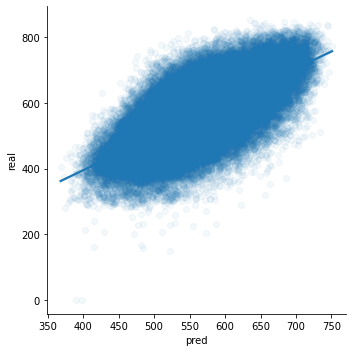

In [ ]:
plota_modelo(aml_pred.as_data_frame(), aml_real.as_data_frame());

In [ ]:
h2o.save_model(aml.leader, path='/content/drive/MyDrive/Digital House/Workshop I/StackedEnsembleModel')

# 20 - LightGBM Parameter tuning

In [ ]:
lgbr.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'regression',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
scores_leaves = {}
for leaves in range(25,36):
  lgbr = lightgbm.LGBMRegressor(objective='regression', num_leaves=leaves)
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(lgbr, X, y['NU_NOTA_MEDIA'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  scores_leaves[leaves] = scores.mean()
  print(f'Num_leaves: {leaves}, Score: {scores.mean()}')

Num_leaves: 25, Score: -55.90682788219373
Num_leaves: 26, Score: -55.90447632927011
Num_leaves: 27, Score: -55.9069253469219
Num_leaves: 28, Score: -55.89642393130868
Num_leaves: 29, Score: -55.89394779728006
Num_leaves: 30, Score: -55.88477511424363
Num_leaves: 31, Score: -55.88940812464258
Num_leaves: 32, Score: -55.872016582655256
Num_leaves: 33, Score: -55.86151290844177
Num_leaves: 34, Score: -55.8755016457391
Num_leaves: 35, Score: -55.85909702448082


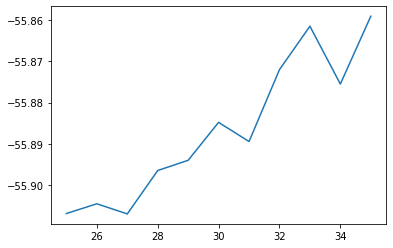

In [ ]:
sns.lineplot(x=scores_leaves.keys(), y=scores_leaves.values());

In [ ]:
r2_leaves = {}
for leaves in range(32,50):
  lgbr = lightgbm.LGBMRegressor(objective='regression', num_leaves=leaves)
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(lgbr, X, y['NU_NOTA_MEDIA'], scoring='r2', cv=cv, n_jobs=-1)
  r2_leaves[leaves] = scores.mean()
  print(f'Num_leaves: {leaves}, r2: {scores.mean()}')

Num_leaves: 32, r2: 0.4287792254731413
Num_leaves: 33, r2: 0.4289441949345724
Num_leaves: 34, r2: 0.42878564766064464
Num_leaves: 35, r2: 0.42921319179576706
Num_leaves: 36, r2: 0.4289785493219311
Num_leaves: 37, r2: 0.42890111202890524
Num_leaves: 38, r2: 0.4290330782073971
Num_leaves: 39, r2: 0.4292084151020526
Num_leaves: 40, r2: 0.4291781977848912
Num_leaves: 41, r2: 0.4291741716159147
Num_leaves: 42, r2: 0.4290403300340799
Num_leaves: 43, r2: 0.4292444364957258
Num_leaves: 44, r2: 0.42935309890841683
Num_leaves: 45, r2: 0.4291217728710075
Num_leaves: 46, r2: 0.42927520760942733
Num_leaves: 47, r2: 0.4290264081820674
Num_leaves: 48, r2: 0.4293268950921097
Num_leaves: 49, r2: 0.4292909124225577


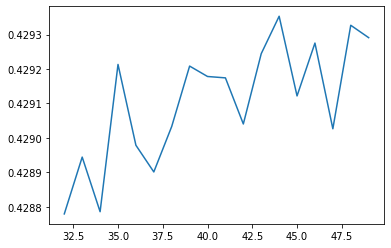

In [ ]:
sns.lineplot(x=r2_leaves.keys(), y=r2_leaves.values());

In [ ]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Digital House/Workshop I/Workshop II.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Digital House/Workshop I/Workshop II.ipynb to html
[NbConvertApp] Writing 1832481 bytes to /content/drive/MyDrive/Digital House/Workshop I/Workshop II.html
